##### Accident prevention - Coursera IBM Data Science Capstone Project <br/>

_This project is for the final Capstone project  for the Data Science professional course_

### 1. Introduction

#### 1.1 Background
According to the World Health Organisation (WHO), approximately 1.35 million people die from road traffic crashes all over the whole world each year. This being a cause for concern globally, the United Nations' Sustainable Goals' (SDGs) targets relating to road safety are to halve global fatalities resulting from road accidents by year 2020 (target 3.6) and  <i>to provide access to safe and sustainable transport for all by 2030</i> (target 11.2). <br/>

The impact of road accidents is very huge ranging from human suffering caused from injuries and deaths to economic burdens  imposed on the society to treat the injured and to take care of the deceased's dependents without mentioning the loss of productivity from those disabled and deceased. <br/>

#### 1.2 Problem
The International Federation of Red Cross and Red Crescent Societies in their handbook of 2007 on road safety guidelines highlighted that road accidents are not only largely preventable but also largely predictable. Wouldn't it be a good thing if we could use the data that we have collected from past accidents to predict the severity of accidents using supervised machine learning algorithms for the emergency response teams to mobilise the required amount of resources for a particular accident occurrence? <br/>

Data about roads, users, vehicle conditions might be relevant in predicting the occurence of an accident and its severity. According to the Haddon Matrix, one of the most popular models that is used in the field of injury prevention  (Wikipedia),  environmental (road design, speed limits and pedestrian facilities ), vehicle and equipment (speed management, lighting, braking, road worthiness) and human factors (police enforcement, attitudes, impairment) are identified as key factors to consider before an accident occurs (pre-crash phase). Some of these factors are also recognised by the United Nations in its effort to curb road traffic accidents globally. To achieve SDG target 3.6, the United Nations identified key areas that need attention some of which include planning, designing and maintaining a safe road infrastructure and promoting high safety standards for new cars.


#### 1.3 Interested stakeholders
Accident severity prediction assists government authorities and health officials to activate the right emergence response procedures just at the time of an accident occuring so that the right resources are mobilised and despatched on time.
I am also persuaded to believe that such information would certainly come in handy for road traffic users to either cancel certain trips or change routes where possible. Road administration authorities could also use the same information to predict and warn road users or advise on other uncongested routes basing on the predicted severity just at the time of the accident occurring. <br/>




###  2. Data

Our data from Seattle's transport department was downloaded from Seattle's website. It contains features on collisions in the city of Seattle, a  seaport city on the West Coast of the United States of America from 2004 to 27 August 2020. This data is available <a href="http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.257%2C47.452%2C-121.405%2C47.776">here</a> <br/>

The dataset we are working with contains 221266 records and 40 columns. <b>Severitycode</b> is going to be our label column. <br/>

<i>**Removing features which are not required** </i> <br/><br/>
The following  features were seen to be not adding value when it comes to developing our predictive models and as such are removed. <ul>
  <li> **OBJECTID, X, Y**  : the ESRI unique identifier and location coordinates <br/>
   <li>**INCKEY, REPORTNO, COLDETKEY, INTKEY**  : a unique key for the incident, report number, secondary key for the incident  and key referencing collision intersection respectively
     <li>**STATUS** : it is not clear what information is stored in this column since it also doesn't appear in the metadata file of the dataset
     <li>**LOCATION** :  description of the location of the collision
     <li>**EXCEPTRSNCODE,EXCEPTRSNDESC** :it is not clear what information is stored in these columns since no descriptions appear in the metadata file of the dataset
     <li>**SEVERITYDESC** :this is simply a description of collision severity code (label) and will not be useful to keep it.
      <li>**INJURIES, SERIOUSINJURIES, FATALITIES** : this information will not be available at the time of the collision at which point we want to predict how severe the collision is.
      <li>**JUNCTIONTYPE** : this column is derived from the ADDRTYPE (collison address type). We will remove this column and retain the ADDRTYPE column.
      <li>**SDOT_COLCODE, SDOT_COLDESC**: the code and description given to collision will only be available after the collision and hence these columns will not help us to predict the collision.
        <li> **COLLISIONTYPE** : collision type is correlated with the collision severity that we want to predict.
       <li> **SDOTCOLNUM** : collision number will not be able to assist in predicting the severity level of an accident.
       <li> **ST_COLCODE, ST_COLDESC** : state collision code and description which will be available after collision has been attended to by state will not be useful to us to create a predictive model.
     <li> **SEGLANEKEY, CROSSWALKKEY** : lane segment and crosswalk keys are not relevant for our predictions.
      
           
           
          
          
          

                                                      
</ul>


In [1]:
#import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [2]:
df = pd.read_csv('Collisions.csv')
df.head()


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [3]:
df.shape

(221266, 40)

Drop  columns which are not required

In [4]:
columns2drop = ['OBJECTID','X','Y','INCKEY','REPORTNO','COLDETKEY','INTKEY','STATUS','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INJURIES',
                'SERIOUSINJURIES','FATALITIES', 'JUNCTIONTYPE','SDOT_COLCODE', 'SDOT_COLDESC','COLLISIONTYPE','SDOTCOLNUM','ST_COLCODE',
                'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY']

In [5]:
dfcd = df.copy()

In [6]:
dfcd.drop(columns2drop, axis=1, inplace=True)

In [7]:
type(dfcd)

pandas.core.frame.DataFrame

In [8]:
dfcd.shape

(221266, 16)

In [9]:
dfcd.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,Intersection,2,2,1,0,1,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,NaN,N,Clear,Dry,Daylight,Y,NaN,N
1,Intersection,2,4,0,0,2,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,Block,1,4,0,0,3,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
3,Intersection,1,2,0,0,2,2004/06/08 00:00:00+00,6/8/2004,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
4,Block,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [10]:
dfcd.isnull().values.sum()

728773

In [11]:
dfcd.isnull().sum(axis = 0).sort_values(ascending = False)

PEDROWNOTGRNT     216078
SPEEDING          211353
INATTENTIONIND    191078
LIGHTCOND          26776
WEATHER            26688
ROADCOND           26608
UNDERINFL          26479
ADDRTYPE            3712
SEVERITYCODE           1
HITPARKEDCAR           0
INCDTTM                0
INCDATE                0
VEHCOUNT               0
PEDCYLCOUNT            0
PEDCOUNT               0
PERSONCOUNT            0
dtype: int64

Let's sanitise the  column values

##### PEDROWNOTGRNT  - Whether or not the pedestrian right of way was not granted (Y/N). We will replace the values with 1 where value is yes and 0 for where value is not yes

In [12]:
dfcd['PEDROWNOTGRNT'].value_counts()

Y    5188
Name: PEDROWNOTGRNT, dtype: int64

In [13]:
dfcd[['PEDROWNOTGRNT']] = dfcd[['PEDROWNOTGRNT']].fillna(value = 'not Y')
dfcd['PEDROWNOTGRNT'].value_counts(normalize= True)

not Y    0.976553
Y        0.023447
Name: PEDROWNOTGRNT, dtype: float64

In [14]:
dfcd['PEDROWNOTGRNT'].replace(to_replace=['Y','not Y'], value=[1,0],inplace=True)

In [15]:
dfcd['PEDROWNOTGRNT'].value_counts()

0    216078
1      5188
Name: PEDROWNOTGRNT, dtype: int64

In [16]:
dfcd.isnull().sum(axis = 0).sort_values(ascending = False)

SPEEDING          211353
INATTENTIONIND    191078
LIGHTCOND          26776
WEATHER            26688
ROADCOND           26608
UNDERINFL          26479
ADDRTYPE            3712
SEVERITYCODE           1
HITPARKEDCAR           0
PEDROWNOTGRNT          0
INCDTTM                0
INCDATE                0
VEHCOUNT               0
PEDCYLCOUNT            0
PEDCOUNT               0
PERSONCOUNT            0
dtype: int64

In [17]:
dfcd.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,Intersection,2,2,1,0,1,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,NaN,N,Clear,Dry,Daylight,1,NaN,N
1,Intersection,2,4,0,0,2,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,NaN,N,Raining,Wet,Dark - Street Lights On,0,NaN,N
2,Block,1,4,0,0,3,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,NaN,N,Clear,Dry,Daylight,0,NaN,N
3,Intersection,1,2,0,0,2,2004/06/08 00:00:00+00,6/8/2004,NaN,0,Raining,Wet,Dark - Street Lights On,0,NaN,N
4,Block,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,NaN,NaN,NaN,NaN,NaN,0,NaN,N


##### SPEEDING  - Whether or not speeding was a factor in the collision. We will replace the values with 1 where value is yes and 0 for where value is not yes

In [18]:
dfcd['SPEEDING'].value_counts()

Y    9913
Name: SPEEDING, dtype: int64

In [19]:
dfcd[['SPEEDING']] = dfcd[['SPEEDING']].fillna(value = 'not Y')
dfcd['SPEEDING'].value_counts(normalize= True)

not Y    0.955199
Y        0.044801
Name: SPEEDING, dtype: float64

In [20]:
dfcd['SPEEDING'].replace(to_replace=['Y','not Y'], value=[1,0],inplace=True)

In [21]:
dfcd['SPEEDING'].value_counts()

0    211353
1      9913
Name: SPEEDING, dtype: int64

In [22]:
dfcd.isnull().sum(axis = 0).sort_values(ascending = False)

INATTENTIONIND    191078
LIGHTCOND          26776
WEATHER            26688
ROADCOND           26608
UNDERINFL          26479
ADDRTYPE            3712
SEVERITYCODE           1
HITPARKEDCAR           0
SPEEDING               0
PEDROWNOTGRNT          0
INCDTTM                0
INCDATE                0
VEHCOUNT               0
PEDCYLCOUNT            0
PEDCOUNT               0
PERSONCOUNT            0
dtype: int64

##### INATTENTIONIND   - Whether or not collision was due to inattention (Y/N). We will replace the values with 1 where value is yes and 0 for where value is not yes

In [23]:
dfcd['INATTENTIONIND'].value_counts()

Y    30188
Name: INATTENTIONIND, dtype: int64

In [24]:
dfcd[['INATTENTIONIND']] = dfcd[['INATTENTIONIND']].fillna(value = 'not Y')
dfcd['INATTENTIONIND'].value_counts(normalize= True)

not Y    0.863567
Y        0.136433
Name: INATTENTIONIND, dtype: float64

In [25]:
dfcd['INATTENTIONIND'].replace(to_replace=['Y','not Y'], value=[1,0],inplace=True)

In [26]:
dfcd['INATTENTIONIND'].value_counts(normalize= True)

0    0.863567
1    0.136433
Name: INATTENTIONIND, dtype: float64

In [27]:
dfcd.isnull().sum(axis = 0).sort_values(ascending = False)

LIGHTCOND         26776
WEATHER           26688
ROADCOND          26608
UNDERINFL         26479
ADDRTYPE           3712
SEVERITYCODE          1
HITPARKEDCAR          0
SPEEDING              0
PEDROWNOTGRNT         0
INATTENTIONIND        0
INCDTTM               0
INCDATE               0
VEHCOUNT              0
PEDCYLCOUNT           0
PEDCOUNT              0
PERSONCOUNT           0
dtype: int64

##### UNDERINFL   - Whether or not a driver involved was under the influence of drugs or alcohol. We will replace the values with 1 where value is yes and 0 for where value is not yes

In [28]:
dfcd['UNDERINFL'].value_counts()

N    103482
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [29]:
# Replace N and Y values with 0 and 1 respectively
dfcd['UNDERINFL'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)

In [30]:
# Fill null values with "##blank" for further treatment
dfcd[['UNDERINFL']] = dfcd[['UNDERINFL']].fillna(value = '##blank')
dfcd['UNDERINFL'].value_counts(normalize= True)

0          0.467681
0          0.369130
##blank    0.119670
1          0.024400
1          0.019117
Name: UNDERINFL, dtype: float64

In [31]:
# Replace string values '1' and '0' with 0 and 1 respectively
dfcd['UNDERINFL'].replace(to_replace=['1','0'], value=[1,0],inplace=True)

In [32]:
dfcd['UNDERINFL'].value_counts(normalize= True)

0          0.836812
##blank    0.119670
1          0.043518
Name: UNDERINFL, dtype: float64

In [33]:
dfcd['UNDERINFL'].value_counts()

0          185158
##blank     26479
1            9629
Name: UNDERINFL, dtype: int64

In [34]:
dfcd.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,Intersection,2,2,1,0,1,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,0,0,Clear,Dry,Daylight,1,0,N
1,Intersection,2,4,0,0,2,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,0,0,Raining,Wet,Dark - Street Lights On,0,0,N
2,Block,1,4,0,0,3,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,0,0,Clear,Dry,Daylight,0,0,N
3,Intersection,1,2,0,0,2,2004/06/08 00:00:00+00,6/8/2004,0,0,Raining,Wet,Dark - Street Lights On,0,0,N
4,Block,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,0,##blank,NaN,NaN,NaN,0,0,N


In [35]:
# HITPARKEDCAR needs attention so that string values 'N'and 'Y' are replaced by 0 and 1 respectively

dfcd['HITPARKEDCAR'].value_counts() 

N    209290
Y     11976
Name: HITPARKEDCAR, dtype: int64

In [36]:
dfcd['HITPARKEDCAR'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)

In [37]:
dfcd.head()

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,Intersection,2,2,1,0,1,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,0,0,Clear,Dry,Daylight,1,0,0
1,Intersection,2,4,0,0,2,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,0,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,Block,1,4,0,0,3,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,0,0,Clear,Dry,Daylight,0,0,0
3,Intersection,1,2,0,0,2,2004/06/08 00:00:00+00,6/8/2004,0,0,Raining,Wet,Dark - Street Lights On,0,0,0
4,Block,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,0,##blank,NaN,NaN,NaN,0,0,0


In [38]:
# convert date columns to datetime objects
dfcd['INCDATE'] = pd.to_datetime(dfcd['INCDATE'])
dfcd['INCDTTM'] = pd.to_datetime(dfcd['INCDTTM'])
dfcd.head()

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,Intersection,2,2,1,0,1,2019-11-20 00:00:00+00:00,2019-11-20 10:25:00,0,0,Clear,Dry,Daylight,1,0,0
1,Intersection,2,4,0,0,2,2019-11-18 00:00:00+00:00,2019-11-18 17:01:00,0,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,Block,1,4,0,0,3,2020-02-20 00:00:00+00:00,2020-02-20 08:42:00,0,0,Clear,Dry,Daylight,0,0,0
3,Intersection,1,2,0,0,2,2004-06-08 00:00:00+00:00,2004-06-08 00:00:00,0,0,Raining,Wet,Dark - Street Lights On,0,0,0
4,Block,0,0,0,0,0,2004-10-15 00:00:00+00:00,2004-10-15 00:00:00,0,##blank,NaN,NaN,NaN,0,0,0


In [39]:
# Add day of week column
dfcd['DAYOFWEEK'] = dfcd['INCDATE'].dt.dayofweek
dfcd['WEEKEND'] = dfcd['DAYOFWEEK'].apply(lambda x: 1 if (x>3)  else 0)
dfcd.head(5)


,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,DAYOFWEEK,WEEKEND
0,Intersection,2,2,1,0,1,2019-11-20 00:00:00+00:00,2019-11-20 10:25:00,0,0,Clear,Dry,Daylight,1,0,0,2,0
1,Intersection,2,4,0,0,2,2019-11-18 00:00:00+00:00,2019-11-18 17:01:00,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
2,Block,1,4,0,0,3,2020-02-20 00:00:00+00:00,2020-02-20 08:42:00,0,0,Clear,Dry,Daylight,0,0,0,3,0
3,Intersection,1,2,0,0,2,2004-06-08 00:00:00+00:00,2004-06-08 00:00:00,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,1,0
4,Block,0,0,0,0,0,2004-10-15 00:00:00+00:00,2004-10-15 00:00:00,0,##blank,NaN,NaN,NaN,0,0,0,4,1


In [40]:
# drop date columns
dfcd.drop(['INCDATE', 'INCDTTM'], axis='columns', inplace=True)
dfcd

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,DAYOFWEEK,WEEKEND
0,Intersection,2,2,1,0,1,0,0,Clear,Dry,Daylight,1,0,0,2,0
1,Intersection,2,4,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
2,Block,1,4,0,0,3,0,0,Clear,Dry,Daylight,0,0,0,3,0
3,Intersection,1,2,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,1,0
4,Block,0,0,0,0,0,0,##blank,NaN,NaN,NaN,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221261,Block,1,2,0,0,2,0,0,Unknown,Unknown,Daylight,0,0,0,3,0
221262,Block,2,2,0,0,2,0,0,Clear,Dry,Daylight,0,0,0,4,1
221263,Intersection,1,2,0,0,2,0,0,Clear,Dry,Daylight,0,0,0,3,0
221264,Block,1,3,0,0,2,0,0,Clear,Dry,Daylight,0,0,0,5,1


In [41]:
dfcd.head()

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,DAYOFWEEK,WEEKEND
0,Intersection,2,2,1,0,1,0,0,Clear,Dry,Daylight,1,0,0,2,0
1,Intersection,2,4,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
2,Block,1,4,0,0,3,0,0,Clear,Dry,Daylight,0,0,0,3,0
3,Intersection,1,2,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,1,0
4,Block,0,0,0,0,0,0,##blank,NaN,NaN,NaN,0,0,0,4,1


In [42]:
dfcd.isnull().sum(axis = 0).sort_values(ascending = False)

LIGHTCOND         26776
WEATHER           26688
ROADCOND          26608
ADDRTYPE           3712
SEVERITYCODE          1
WEEKEND               0
DAYOFWEEK             0
HITPARKEDCAR          0
SPEEDING              0
PEDROWNOTGRNT         0
UNDERINFL             0
INATTENTIONIND        0
VEHCOUNT              0
PEDCYLCOUNT           0
PEDCOUNT              0
PERSONCOUNT           0
dtype: int64

In [43]:
# checking values of remaining columns that still have null values
dfcd['LIGHTCOND'].value_counts()

Daylight                    119166
Dark - Street Lights On      50053
Unknown                      13523
Dusk                          6076
Dawn                          2599
Dark - No Street Lights       1573
Dark - Street Lights Off      1236
Other                          244
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

In [44]:
dfcd['WEATHER'].value_counts()

Clear                       114361
Raining                      34021
Overcast                     28508
Unknown                      15131
Snowing                        919
Other                          853
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [45]:
dfcd['ROADCOND'].value_counts()

Dry               128171
Wet                48715
Unknown            15131
Ice                 1231
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [46]:
dfcd['ADDRTYPE'].value_counts() 

Block           144857
Intersection     71823
Alley              874
Name: ADDRTYPE, dtype: int64

In [47]:
dfcd['SEVERITYCODE'].value_counts() 

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

####   Deal with null values 

In [48]:
# Let's first 'drop' the 1 row where our label (SEVERITYCODE) is null. Here we create new data frame which consists of all
# rows whose severity code is not NA

dfcd1 = dfcd.copy

In [49]:
dfcd1 = dfcd[dfcd['SEVERITYCODE'].notna()]

In [50]:
dfcd1.shape

(221265, 16)

In [51]:
dfcd1.isnull().sum(axis = 0).sort_values(ascending = False)

LIGHTCOND         26776
WEATHER           26688
ROADCOND          26608
ADDRTYPE           3712
WEEKEND               0
DAYOFWEEK             0
HITPARKEDCAR          0
SPEEDING              0
PEDROWNOTGRNT         0
UNDERINFL             0
INATTENTIONIND        0
VEHCOUNT              0
PEDCYLCOUNT           0
PEDCOUNT              0
PERSONCOUNT           0
SEVERITYCODE          0
dtype: int64

In [52]:
#  Replace all null values  for the remaining columns with '##blank' for further treatment
dfcd1[['LIGHTCOND']] = dfcd1[['LIGHTCOND']].fillna(value = '##blank')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [53]:
dfcd1.head(3)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,DAYOFWEEK,WEEKEND
0,Intersection,2,2,1,0,1,0,0,Clear,Dry,Daylight,1,0,0,2,0
1,Intersection,2,4,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
2,Block,1,4,0,0,3,0,0,Clear,Dry,Daylight,0,0,0,3,0


In [54]:
# Visualising correlation of columns and severity codes distributions
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
dfcd1.dtypes

ADDRTYPE          object
SEVERITYCODE      object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INATTENTIONIND     int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT      int64
SPEEDING           int64
HITPARKEDCAR       int64
DAYOFWEEK          int64
WEEKEND            int64
dtype: object

In [56]:
dfcd1['SEVERITYCODE'].value_counts()

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

In [57]:
# add new severity code column and convert to float
dfcd1['SEVERITYNEW'] = dfcd1['SEVERITYCODE']
dfcd1['SEVERITYNEW'] = dfcd1['SEVERITYNEW'].apply(lambda x: 2.5 if (x=='2b')  else x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
dfcd1['SEVERITYNEW'] = dfcd1['SEVERITYNEW'].astype(float)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
dfcd1['SEVERITYNEW'].value_counts()

1.0    137485
2.0     58698
0.0     21635
2.5      3098
3.0       349
Name: SEVERITYNEW, dtype: int64

In [60]:
dfcd1.dtypes

ADDRTYPE           object
SEVERITYCODE       object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INATTENTIONIND      int64
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT       int64
SPEEDING            int64
HITPARKEDCAR        int64
DAYOFWEEK           int64
WEEKEND             int64
SEVERITYNEW       float64
dtype: object

In [61]:
# create dataframe for integer and float columns only
dfcorr = dfcd1.loc[:,dfcd1.dtypes =='int64'].merge(dfcd1.loc[:,dfcd1.dtypes =='float64'], left_index=True, right_index=True)

In [62]:
dfcorr.dtypes

PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INATTENTIONIND      int64
PEDROWNOTGRNT       int64
SPEEDING            int64
HITPARKEDCAR        int64
DAYOFWEEK           int64
WEEKEND             int64
SEVERITYNEW       float64
dtype: object

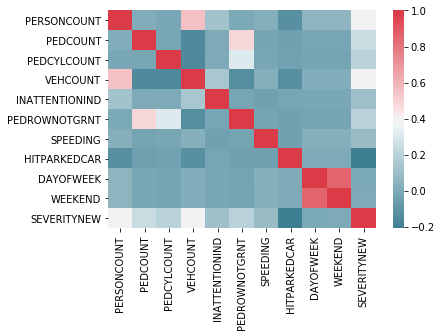

In [63]:
# a quick view of correlation of the columns
#corr = dfcd1.loc[:,dfcd1.dtypes == 'int64'].corr()
corr = dfcorr.loc[:,:].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Although the above heatmap drawn by the seaborn Heatmap function is not a perfect tool, we can have some better understanding  at a glance that the  vehicle count (VEHCOUNT) and the total number of people involved in a collision (PERSONCOUNT) has some positive correlation with the severity of the collision. A negative correlation exists between the severity of a collision and a collision which involves hitting a parked car.

In [64]:
# Let's drop the converted severity code
dfcd1.drop(['SEVERITYNEW'], axis='columns', inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


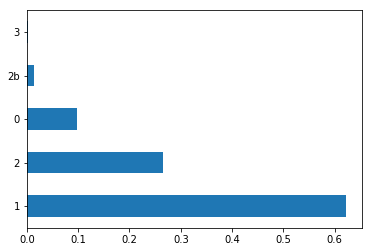

In [65]:
# View distribution of severity codes
dfcd1['SEVERITYCODE'].value_counts(normalize=True).plot(kind = 'barh')

In [66]:
dfcd1['SEVERITYCODE'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1     62.1%
2     26.5%
0      9.8%
2b     1.4%
3      0.2%
Name: SEVERITYCODE, dtype: object

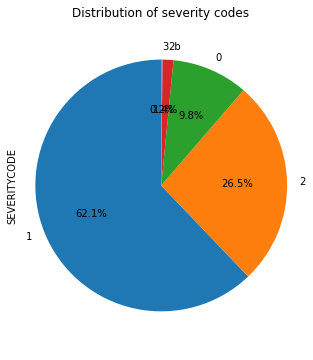

In [67]:
# autopct create %, start angle represent starting point
dfcd1['SEVERITYCODE'].value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90%
                            shadow=False,       # no shadow      
                            )

plt.title('Distribution of severity codes')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

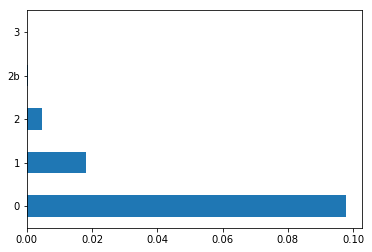

In [68]:
Null_LightCond= dfcd1[dfcd1.LIGHTCOND == '##blank']['SEVERITYCODE'].value_counts()/len(dfcd1)
Null_LightCond.plot(kind = 'barh')

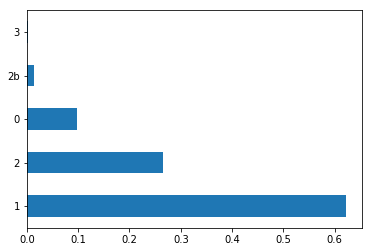

In [69]:
all_records = dfcd1['SEVERITYCODE'].value_counts()/len(dfcd1)
all_records.plot(kind = 'barh')

In [70]:
all_records

1     0.621359
2     0.265284
0     0.097779
2b    0.014001
3     0.001577
Name: SEVERITYCODE, dtype: float64

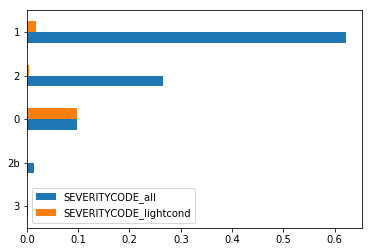

In [71]:
#features_of_interest = pd.DataFrame({'severity_all': all_records['SEVERITYCODE'], 'severity_lightcond': Null_LightCond})
all_records_df = all_records.to_frame()
Null_LightCond_df = Null_LightCond.to_frame()
combined_df = all_records_df.merge(Null_LightCond_df, left_index=True, right_index=True, suffixes=['_all','_lightcond'])
combined_df[['SEVERITYCODE_all', 'SEVERITYCODE_lightcond']].sort_values(by=['SEVERITYCODE_all', 'SEVERITYCODE_lightcond'], ascending=True).plot(kind='barh')


In [72]:
all_records_df

,SEVERITYCODE
1,0.621359
2,0.265284
0,0.097779
2b,0.014001
3,0.001577


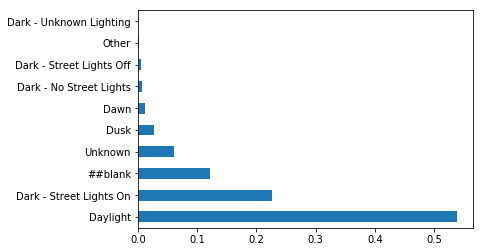

In [73]:
(dfcd1['LIGHTCOND'].value_counts()/len(dfcd1)).plot(kind = 'barh')

In the above graph we see a number of nulls ('##blank') and unknowns which presents a challenge to us. A closer look will show that both unknowns and blanks constitute less than 25% of the total number rows. We should be able to proceed without these rows.

In [74]:
dfcd2 = dfcd1[dfcd1['LIGHTCOND'] != '##blank']

In [75]:
dfcd2.shape

(194489, 16)

In [76]:
dfcd2 = dfcd2[dfcd2['LIGHTCOND'] != 'Unknown']

In [77]:
dfcd2.shape

(180966, 16)

In [78]:
dfcd2[['WEATHER']] = dfcd2[['WEATHER']].fillna(value = '##blank')

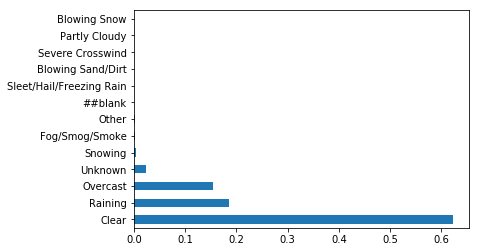

In [79]:
(dfcd2['WEATHER'].value_counts()/len(dfcd2)).plot(kind = 'barh')

We also see a number of rows with unknown weather conditions. Since these are less than 5% of the total number of rows. We should be able to proceed without these rows.

In [80]:
dfcd2 = dfcd2[dfcd2['WEATHER'] != 'Unknown']

In [81]:
dfcd2.shape

(176603, 16)

In [82]:
dfcd2[['ROADCOND']] = dfcd2[['ROADCOND']].fillna(value = '##blank')

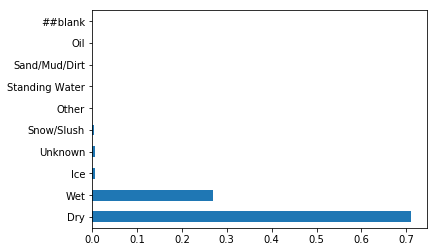

In [83]:
(dfcd2['ROADCOND'].value_counts()/len(dfcd2)).plot(kind = 'barh')

Let's remove the few rows with unknown values in column ROADCOND

In [84]:
dfcd2 = dfcd2[dfcd2['ROADCOND'] != 'Unknown']

In [85]:
dfcd2.shape

(175542, 16)

In [86]:
dfcd2[['ADDRTYPE']] = dfcd2[['ADDRTYPE']].fillna(value = '##blank')

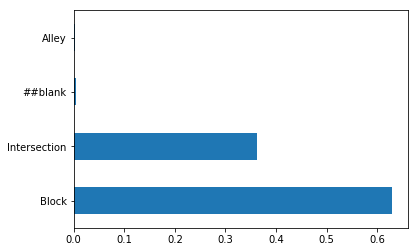

In [87]:
(dfcd2['ADDRTYPE'].value_counts()/len(dfcd2)).plot(kind = 'barh')

Let's drop the few null values

In [88]:
dfcd2 = dfcd2[dfcd2['ADDRTYPE'] != '##blank']

In [89]:
dfcd2.shape

(174806, 16)

In [90]:
dfcd2['LIGHTCOND'].value_counts() 

Daylight                    115394
Dark - Street Lights On      48273
Dusk                          5807
Dawn                          2512
Dark - No Street Lights       1445
Dark - Street Lights Off      1155
Other                          202
Dark - Unknown Lighting         18
Name: LIGHTCOND, dtype: int64

In [91]:
dfcd2['ADDRTYPE'].value_counts() 

Block           110528
Intersection     63671
Alley              607
Name: ADDRTYPE, dtype: int64

In [92]:
dfcd2.isnull().sum(axis = 0).sort_values(ascending = False)

WEEKEND           0
DAYOFWEEK         0
HITPARKEDCAR      0
SPEEDING          0
PEDROWNOTGRNT     0
LIGHTCOND         0
ROADCOND          0
WEATHER           0
UNDERINFL         0
INATTENTIONIND    0
VEHCOUNT          0
PEDCYLCOUNT       0
PEDCOUNT          0
PERSONCOUNT       0
SEVERITYCODE      0
ADDRTYPE          0
dtype: int64

In [93]:
dfclean = dfcd2.copy()

In [94]:
dfclean.shape

(174806, 16)

In [95]:
dfclean1 = dfclean.copy()

In [96]:
# Our labels
y = dfclean["SEVERITYCODE"]

In [97]:
dfclean1.drop(['SEVERITYCODE'], axis='columns', inplace=True) 

In [98]:
dfclean1.head(4)

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,DAYOFWEEK,WEEKEND
0,Intersection,2,1,0,1,0,0,Clear,Dry,Daylight,1,0,0,2,0
1,Intersection,4,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
2,Block,4,0,0,3,0,0,Clear,Dry,Daylight,0,0,0,3,0
3,Intersection,2,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,1,0


In [99]:
y.value_counts()

1     115193
2      56293
2b      2983
3        335
0          2
Name: SEVERITYCODE, dtype: int64

In [100]:
y.head(4)

0    2
1    2
2    1
3    1
Name: SEVERITYCODE, dtype: object

In [101]:
dfclean1.shape

(174806, 15)

In [102]:
# One hot encoding for categorical columns 

dfclean1 = pd.get_dummies(dfclean1)

In [103]:
#print(dfclean1.head(5))

In [104]:
X = dfclean1

In [105]:
X.head(5)

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,DAYOFWEEK,WEEKEND,...,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other
0,2,1,0,1,0,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
1,4,0,0,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,4,0,0,3,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,2,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
6,2,0,0,2,0,0,0,0,6,1,...,0,0,0,0,1,0,0,0,0,0


#### Normalizing Data

In [106]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-3.54736071e-01,  4.29135074e+00, -1.84253374e-01,
        -1.62973016e+00, -4.45404132e-01,  5.83242896e+00,
        -2.42079880e-01, -1.72284236e-01, -4.90832383e-01,
        -8.50917781e-01, -5.90298279e-02, -1.31130881e+00,
         1.32115749e+00,  2.39500396e-01, -2.39487044e-01,
        -2.39179016e-03, -2.58797545e-02, -1.56859015e-02,
        -2.39179016e-03,  7.51535504e-01, -5.65382615e-02,
        -3.88174191e-02, -4.33525402e-01, -7.17553467e-03,
        -4.86641881e-01, -1.21966569e-02, -2.54332272e-02,
        -6.94460491e-02, -1.63994451e-02,  6.31936373e-01,
        -8.00128952e-02, -1.86836851e-02, -2.49787399e-02,
        -1.95813432e-02, -6.99433327e-02, -2.48638233e-02,
        -6.11106528e-01, -9.12973605e-02, -8.15553297e-02,
        -6.17661088e-01, -1.01479997e-02, -1.20746553e-01,
         7.17538936e-01, -1.85367608e-01, -3.40132860e-02],
       [ 1.04432747e+00, -2.09158358e-01, -1.84253374e-01,
         6.32522220e-02, -4.45404132e-01, -1.71455153e-

### 3. Splitting data <br>
Now that we have hot encoded all categorical features and also normalized the values, we will go ahead and split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [107]:
!pip install sklearn

In [108]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'severity' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 139844 samples.
Testing set has 34962 samples.


### 4. Modelling and evaluations ###

In [109]:
# import libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

We will choose the best model from 3 models below
<ul> 
    <li> Decision trees: one of the model's biggest strength is that it is not easily affected by outliers and it learns non-linear relationships well. However, one of its downsides is that it tends to overfit on training data.  
    <li> Support Vector Machine (SVM): SVM model is opted due to the model's ability to handle data with large number of feature attributes and has a strong capability to generalise.
    <li> Logistic regression: this model is simple to implement, prevents overfitting although overfitting is highly possible in high dimensional planes. 
    
  </ul>
 
 <b> *References* </b>
<ul>
    <li> <a href="http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of.html"> http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of.html </a>
     <li> <a href="https://easyai.tech/en/ai-definition/svm/">https://easyai.tech/en/ai-definition/svm/</a>
    </ul>
    

#### 4.1 Decision Tree ####

In [110]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [111]:
# find the best value for depth (d)
Ds = 15
mean_acc_dt = np.zeros((Ds-1))
#ConfustionMx = [];
for d in range(1,Ds):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    #drugTree # it shows the default parameters
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    mean_acc_dt[d-1] = metrics.accuracy_score(y_test, predTree)
mean_acc_dt 

array([0.68683142, 0.71157256, 0.71157256, 0.71160117, 0.71343173,
       0.71386076, 0.71509067, 0.71563412, 0.71594874, 0.71460443,
       0.71340312, 0.71265946, 0.71011384, 0.70811166])

In [112]:
print( "The best accuracy was with", mean_acc_dt[0:14].max(), "with max_depth=", mean_acc_dt[0:14].argmax()+1) 

The best accuracy was with 0.7159487443510096 with max_depth= 9


In [113]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
DT_yhat = DT_model.predict(X_test)
print("DT Accuracy-score: %.2f" % metrics.accuracy_score(y_test, DT_yhat) )
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Accuracy-score: 0.72
DT Jaccard index: 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


DT F1-score: 0.66


### 4.2 Support Vector Machine ###

In [209]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Accuracy score: %.2f" % metrics.accuracy_score(y_test, SVM_yhat))
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Accuracy score: 0.71
SVM Jaccard index: 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


SVM F1-score: 0.65


### 4.3 Logistic Regression ###

In [115]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)

In [125]:
import numpy
unique, counts = numpy.unique(LR_yhat, return_counts=True)
dict(zip(unique, counts))


{'1': 31172, '2': 3784, '2b': 6}

In [121]:
y_test.value_counts()

1     22960
2     11383
2b      557
3        62
Name: SEVERITYCODE, dtype: int64

In [134]:
unique, counts = numpy.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{'0': 2, '1': 92233, '2': 44910, '2b': 2426, '3': 273}

In [127]:
LR_yhat_prob.shape

(34962, 5)

In [128]:
y_test.shape

(34962,)

In [131]:
LR_yhat_prob[2]

array([5.78864999e-05, 6.52154972e-01, 3.35588455e-01, 1.13172915e-02,
       8.81395271e-04])

In [135]:
print("LR Accuracy score: %.2f" % metrics.accuracy_score(y_test, LR_yhat))
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob,labels=['0','1', '2', '2b', '3']))

LR Accuracy score: 0.71
LR Jaccard index: 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


LR F1-score: 0.66
LR LogLoss: 0.63


### 5 Model performance report and conclusion ###



| Algorithm          |Accuracy score| Jaccard | F1-score | LogLoss |
|--------------------|--------------|---------|----------|---------|
| Decision Tree      | 0.72         | 0.72    | 0.66     | NA      |
| SVM                | 0.71         | 0.71    | 0.65     | NA      |
| LogisticRegression | 0.71         | 0.71    | 0.66     | 0.63    |

In [182]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
dat=array([["Decision tree", 0.72,0.72,0.66],["SVM",0.71,0.71,0.65],["Logistic regression",0.71,0.71,0.66]])

In [141]:
perf_df = pd.DataFrame(dat, columns = ["Algorithm", "Accuracy score", "Jaccard", "F1-score"])
perf_df

,Algorithm,Accuracy score,Jaccard,F1-score
0,Decision tree,0.72,0.72,0.66
1,SVM,0.71,0.71,0.65
2,Logistic regression,0.71,0.71,0.66


In [146]:
perf_df1 = perf_df.set_index('Algorithm')


In [147]:
perf_df1

,Accuracy score,Jaccard,F1-score
Algorithm,,,
Decision tree,0.72,0.72,0.66
SVM,0.71,0.71,0.65
Logistic regression,0.71,0.71,0.66


In [161]:
perf_df1[["Accuracy score", "Jaccard", "F1-score"]] = perf_df1[["Accuracy score", "Jaccard", "F1-score"]].apply(pd.to_numeric)

In [201]:
np.stack(perf_df1.index).astype(str)

array(['Decision tree', 'SVM', 'Logistic regression'], dtype='<U19')

In [187]:
algorithms.values

array(['Decision tree', 'SVM', 'Logistic regression'], dtype=object)

In [232]:
#plt.rcParams["figure.figsize"] = [15, 10]
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot')

In [235]:
# revert to default style
plt.rcParams.update(plt.rcParamsDefault)

(0, 100)

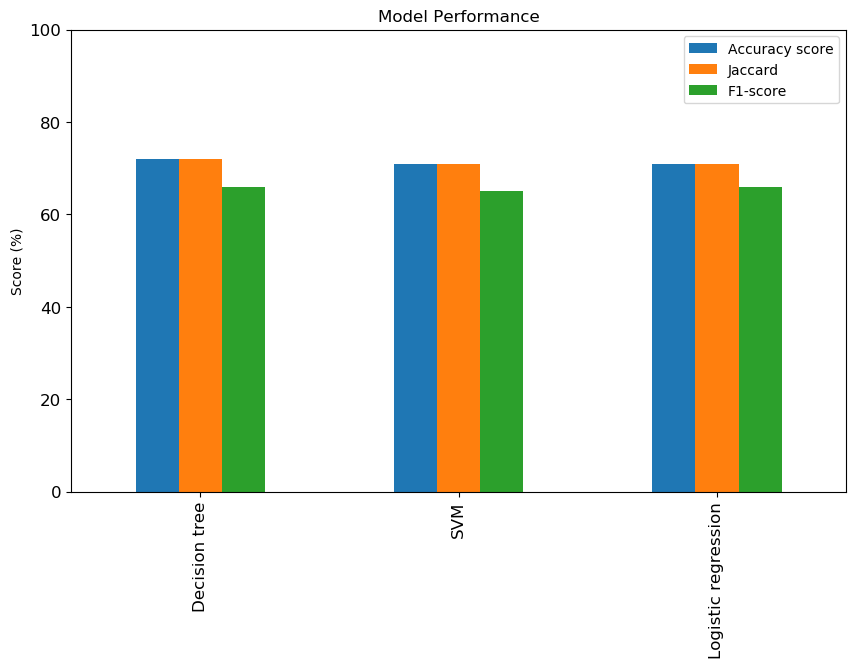

In [247]:
ax = perf_df1[['Accuracy score', 'Jaccard', 'F1-score']].mul(100).plot(kind='bar', title ="Model Performance", figsize=(10, 6), legend=True, fontsize=12)
ax.set_ylabel("Score (%)")
ax.set_xlabel("")
ax.set_ylim(0,100)

In [248]:
perf_df1

,Accuracy score,Jaccard,F1-score
Algorithm,,,
Decision tree,0.72,0.72,0.66
SVM,0.71,0.71,0.65
Logistic regression,0.71,0.71,0.66


From the evaluation metrics above, we can see that the Decision Tree model has the highest accuracy score although the differences (72% vs 71% for other models) indicate that all models have generally the same level of performance. The Logistic regression model has a generally high (63%) log loss which indicates that the predicted probability is 63% far from actual labels on average. Efforts should be made to reduce the log loss and increasing the accuracy score.

Previous studies have indicated that location type is a good feature to predict accident severity [ <a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0214966#"> 1 </a> ] There is therefore room to improve the models by incorporating the geolocation data columns into building the models. These columns can be used by zoning the geolocation columns and then hot encode the categorical zone column.


 <b> *References* </b>
<ul>
    <li> <a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0214966#"> https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0214966# </a>
     <li> <a href="https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c">https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c/</a>
    </ul>
    